In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
consumer = pd.read_excel("Customer_marketing_dataset.xlsx")
consumer.head(12)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,2,6,4,10,6,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,4,7,3,7,6,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,2,4,0,4,8,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,1,3,0,2,9,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,1,1,0,0,20,1,0,0,0,0


In [3]:
consumer.shape

(2240, 24)

In [4]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [5]:
consumer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [6]:
consumer[consumer["Income"].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,1,1,0,2,7,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,27,0,0,1,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,1,1,3,4,2,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,3,2,1,4,6,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,2,2,0,3,6,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,3,3,0,3,8,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,12,7,2,8,9,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,1,1,0,2,7,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,2,4,8,1,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,3,6,1,7,6,0,0,0,0,0


Based on those analysis, we can draw the following conclusions:
1. There are 24 missing values in Income column.
2. The column named "Dt_Customer" indicates the date when the customer enrolled with the company. The data type should be DateTime, but it is currently listed as an object.

In [7]:

income_means = consumer.groupby(['Education', 'Marital_Status'])['Income'].mean().reset_index()
consumer = consumer.merge(income_means, on=['Education', 'Marital_Status'], suffixes=('', '_mean'))
consumer['Income'] = consumer['Income'].fillna(consumer['Income_mean'])
consumer = consumer.drop('Income_mean', axis=1)



The missing value in the "Income" column was replaced with the mean income based on the "Education" and "Marital_Status" columns. Since income is correlated with education and marital status, So I used this method was used to handle the missing value.

In [8]:
consumer.isnull().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [9]:
consumer.shape

(2240, 24)

In [10]:
consumer.head(15)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,0,0,0,0
2,7892,1969,Graduation,Single,18589.000000,0,0,02-01-2013,89,6,...,2,2,1,3,7,0,0,0,0,0
3,5255,1986,Graduation,Single,51322.182927,1,0,20-02-2013,19,5,...,0,27,0,0,1,0,0,0,0,0
4,1371,1976,Graduation,Single,79941.000000,0,0,28-06-2014,72,123,...,1,2,4,9,1,0,0,0,0,0
5,7244,1951,Graduation,Single,51322.182927,2,1,01-01-2014,96,48,...,3,2,1,4,6,0,0,0,0,0
6,1331,1977,Graduation,Single,35790.000000,1,0,02-01-2013,54,12,...,2,2,0,3,7,0,0,0,0,0
7,7437,1988,Graduation,Single,27938.000000,1,0,28-04-2014,31,13,...,1,1,0,4,3,0,0,0,0,0
8,8557,1982,Graduation,Single,51322.182927,1,0,17-06-2013,57,11,...,2,2,0,3,6,0,0,0,0,0
9,1012,1952,Graduation,Single,61823.000000,0,1,18-02-2013,26,523,...,4,8,2,10,7,0,0,0,0,0


Converting the 'Dt_Customer' column form object to date format and then finding the new and old date of customer's enrollment within the company

In [11]:
consumer['Dt_Customer'] = pd.to_datetime(consumer['Dt_Customer'],format= "%d-%m-%Y")
print(consumer['Dt_Customer'].dtypes)
consumer["Dt_Customer"].max(), consumer["Dt_Customer"].min()

datetime64[ns]


(Timestamp('2014-06-29 00:00:00'), Timestamp('2012-07-30 00:00:00'))

Checking and understanding the categorical variables "Education" and "Marital_Status" by exploring their unique values

In [12]:
consumer['Education'].value_counts() 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [13]:
consumer['Marital_Status'].value_counts() 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

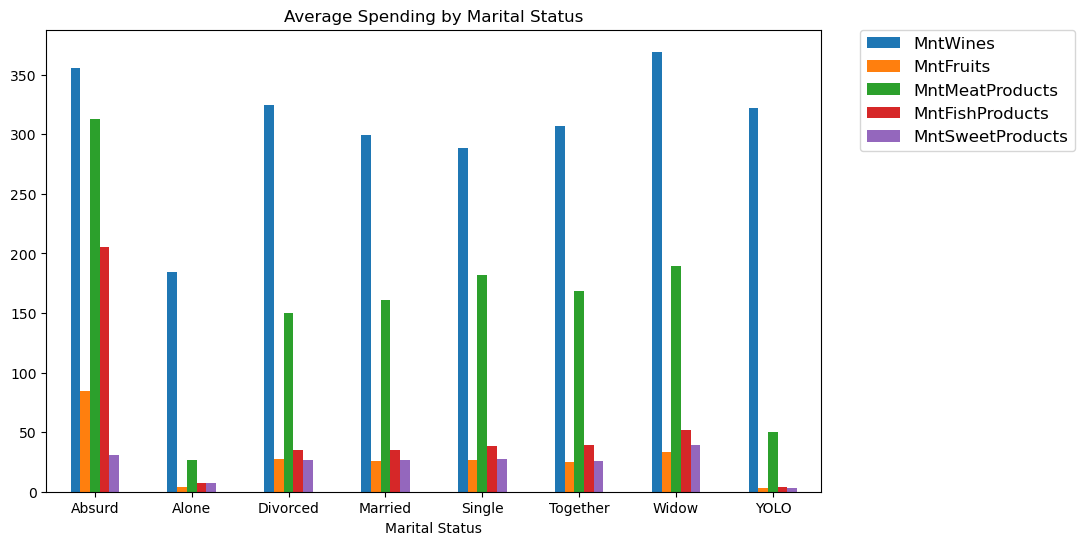

In [14]:

# Group by Marital_Status and calculate the mean of the selected columns
b = consumer.groupby(["Marital_Status"])[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']].mean()

# Plot the data as a bar chart
b.plot(kind="bar", figsize=(10, 6))

# Add a title to the plot
plt.title("Average Spending by Marital Status")

# Add labels to the x-axis
plt.xlabel("Marital Status")

# Rotate x-axis labels
plt.xticks(rotation=0)

# Increase font size for readability
plt.rcParams.update({'font.size': 12})

# Use a different color palette
sns.set_palette("Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [15]:
#Adding the new feature in the dataset Age by calculating the "Age" of a customer by the "Year_Birth"
current_year = dt.datetime.now().year
consumer["Age"] = current_year - consumer["Year_Birth"]

In [16]:
consumer["Products_spent"] = consumer["MntWines"]+consumer["MntFruits"]+consumer["MntMeatProducts"]+consumer["MntFishProducts"]+consumer["MntSweetProducts"]

Creating a new feature by replacing the 'Marital_Status' with 'Relationship_Status' which denotes whether they are together or Alone.
With 'Family_Memeber' we can calculate the total number of family members in a given family.
These features can help segment customers based on their living situation and family composition, which can be valuable for tailoring marketing strategies.

In [17]:
consumer['Relationship_Status'] = consumer['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
consumer['Children'] = consumer["Kidhome"]+consumer["Teenhome"] 
consumer["Family_Memeber"] = consumer["Relationship_Status"].replace({"Alone": 1, "Partner": 2})+ consumer["Children"]
consumer["Parent"] = np.where(consumer.Children> 0, 1, 0)

In [18]:
#Now Droping few unwanted columns
consumer = consumer.drop(columns = ['Marital_Status', 'Dt_Customer', 'ID', 'Year_Birth'], axis = 1)

In [19]:
consumer.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Products_spent,Relationship_Status,Children,Family_Memeber,Parent
0,Graduation,58138.000000,0,0,58,635,88,546,172,88,...,0,0,0,1,67,1529,Alone,0,1,0
1,Graduation,46344.000000,1,1,38,11,1,6,2,1,...,0,0,0,0,70,21,Alone,2,3,1
2,Graduation,18589.000000,0,0,89,6,4,25,15,12,...,0,0,0,0,55,62,Alone,0,1,0
3,Graduation,51322.182927,1,0,19,5,1,3,3,263,...,0,0,0,0,38,275,Alone,1,2,1
4,Graduation,79941.000000,0,0,72,123,164,266,227,30,...,0,0,0,0,48,810,Alone,0,1,0


In [20]:
consumer.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Products_spent', 'Relationship_Status', 'Children', 'Family_Memeber',
       'Parent'],
      dtype='object')

In [21]:
consumer.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,...,AcceptedCmp3,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Products_spent,Children,Family_Memeber,Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52248.748825,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,2.325000,...,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,561.776339,0.950446,2.595089,0.715179
std,25039.981052,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,1.932238,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,576.613680,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,4.000000,0.000000,1.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,55.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,341.000000,1.000000,3.000000,1.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,964.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2491.000000,3.000000,5.000000,1.000000


From this, we can clearly see some outliers in the income and age features, so I will be removing those outliers in the data.

In [22]:

consumer = consumer[(consumer["Age"]<90)]
consumer = consumer[(consumer["Income"]<600000)]

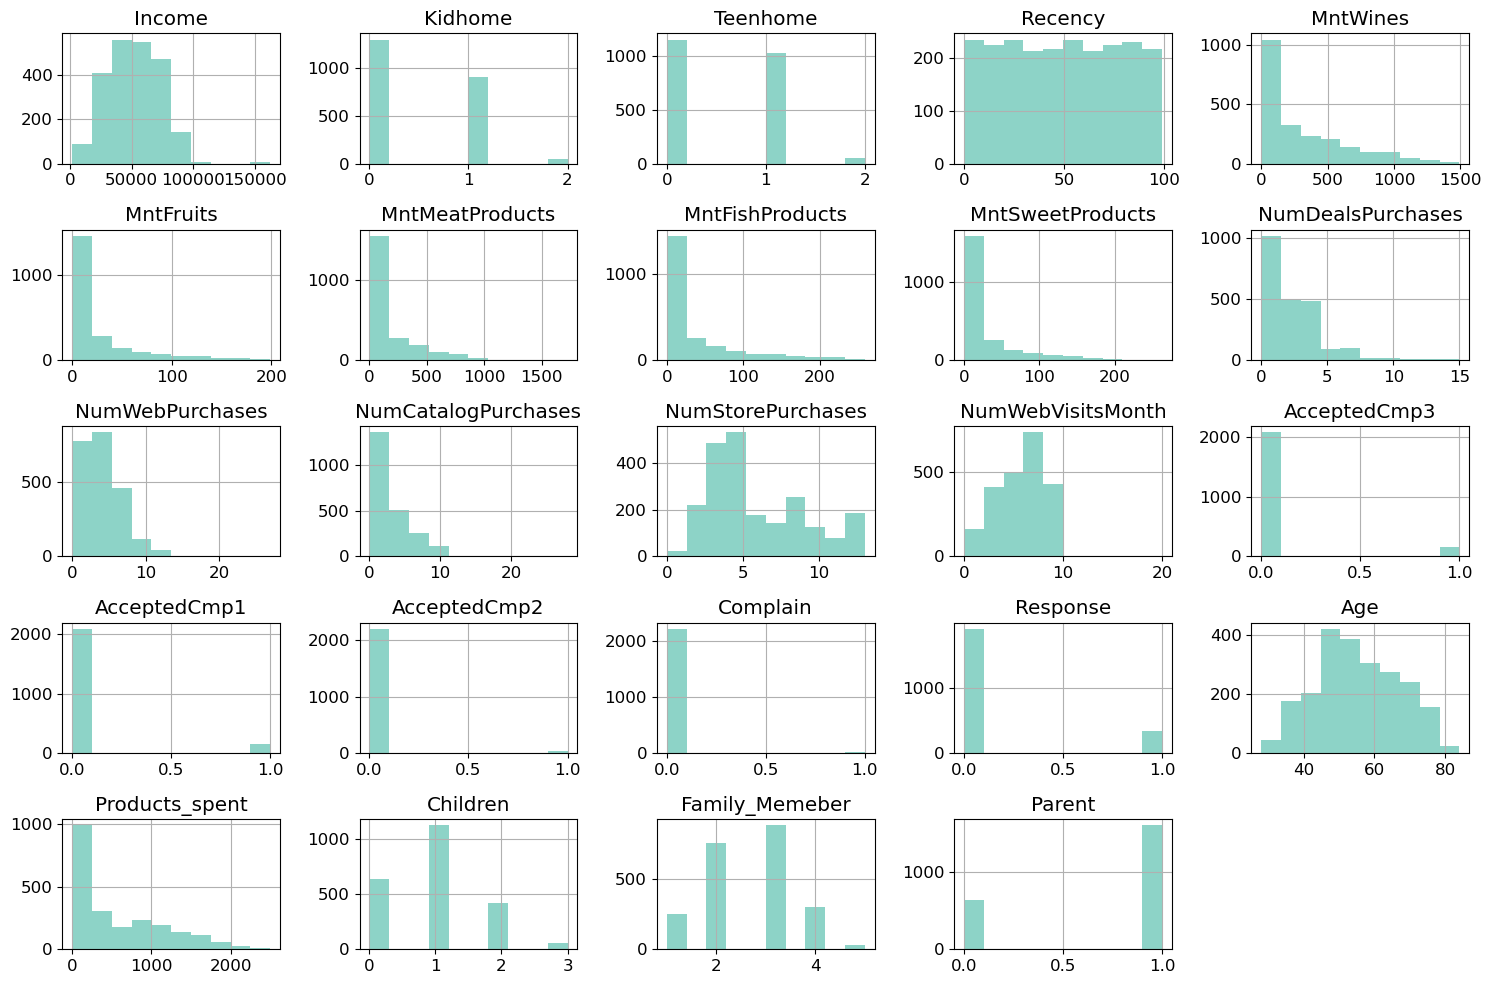

In [23]:

# Increase font size for general readability
plt.rcParams.update({'font.size': 12})

# Visualize the distribution of variables
consumer.hist(figsize=(15, 10), grid=True)  # Increased figure size and added gridlines

# Adjust x-axis label rotation for potentially long variable names
plt.xticks(rotation=45, ha='right')  # Rotated 45 degrees and right-aligned for readability

# Show histogram plot
plt.tight_layout()  # Adjust spacing between elements
plt.show()

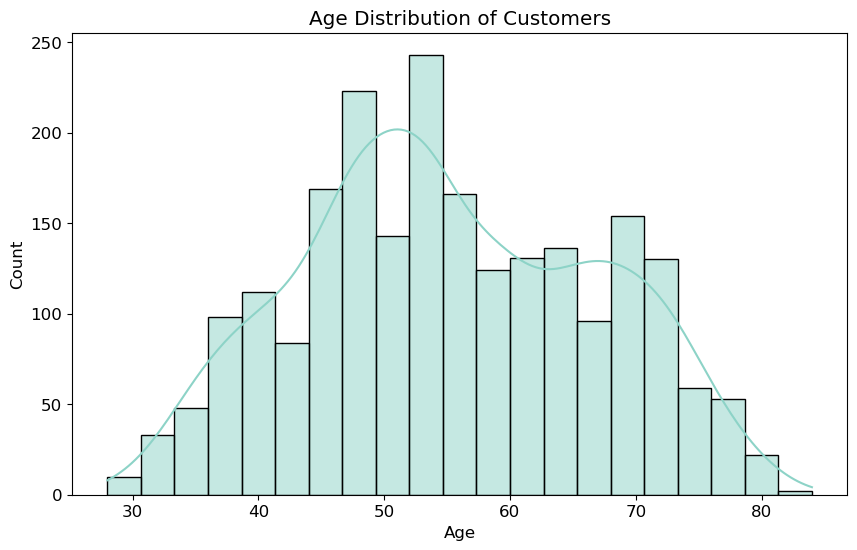

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=consumer, x="Age", kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

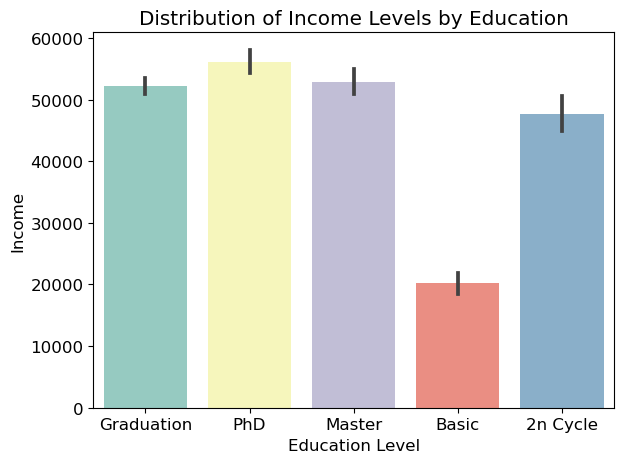

In [25]:
# Increase font size for general readability
plt.rcParams.update({'font.size': 12})

# Visualize the distribution of income levels for each education level
sns.barplot(data=consumer, x="Education", y="Income")
plt.title("Distribution of Income Levels by Education")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

From this plot, PhD holders earn the highest income, followed by those with graduate and master's degrees. Basic education backgrounds earn the least, while those with 2nd cycle education earn about 48k.

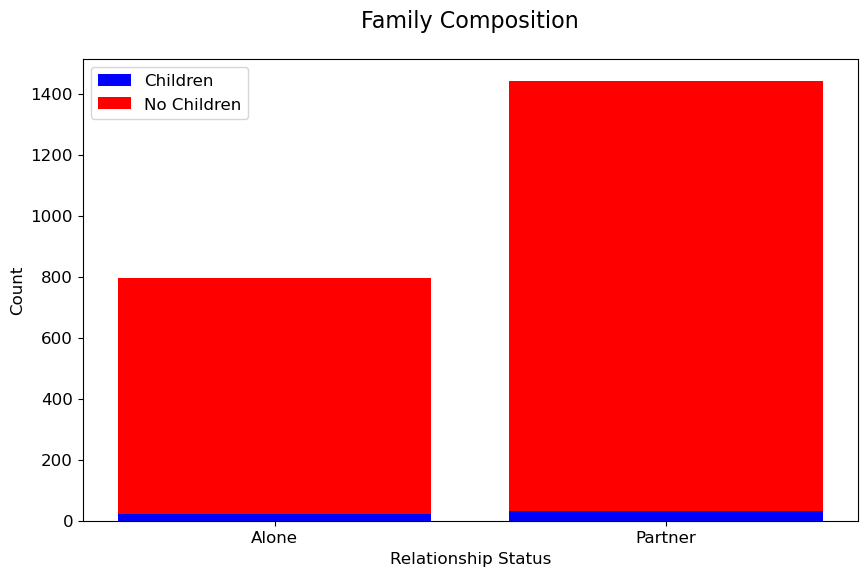

In [26]:
# Create a stacked bar plot of relationship status and family size
family_counts = consumer.groupby(['Relationship_Status', 'Children']).size().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
ax.bar(family_counts['Relationship_Status'], family_counts['Count'], color='blue', label='Children')
ax.bar(family_counts['Relationship_Status'], family_counts.groupby('Relationship_Status')['Count'].transform('sum') - family_counts['Count'], bottom=family_counts['Count'], color='red', label='No Children')

# Add a legend
ax.legend()

# Set the title and labels
plt.title("Family Composition", fontsize=16, y=1.05)
plt.xlabel("Relationship Status")
plt.ylabel("Count")

# Show the plot
plt.show()

By this plot, the child rate is lower for both Relationship Status, even for those who are single or parents.

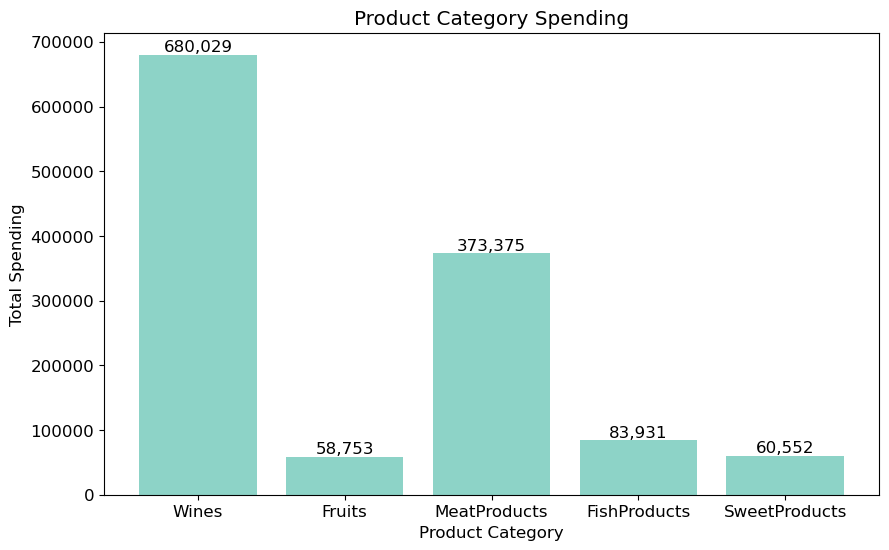

In [27]:

product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
category_spending = consumer[product_categories].sum().values
category_labels = [category.replace('Mnt', '') for category in product_categories]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(category_labels, category_spending)
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Spending')
ax.set_title('Product Category Spending')

for i, v in enumerate(category_spending):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
    
plt.show()

By this plot, we can understand that wine and meat products are the most commonly purchased items, while fruits and sweets are the least commonly purchased.    

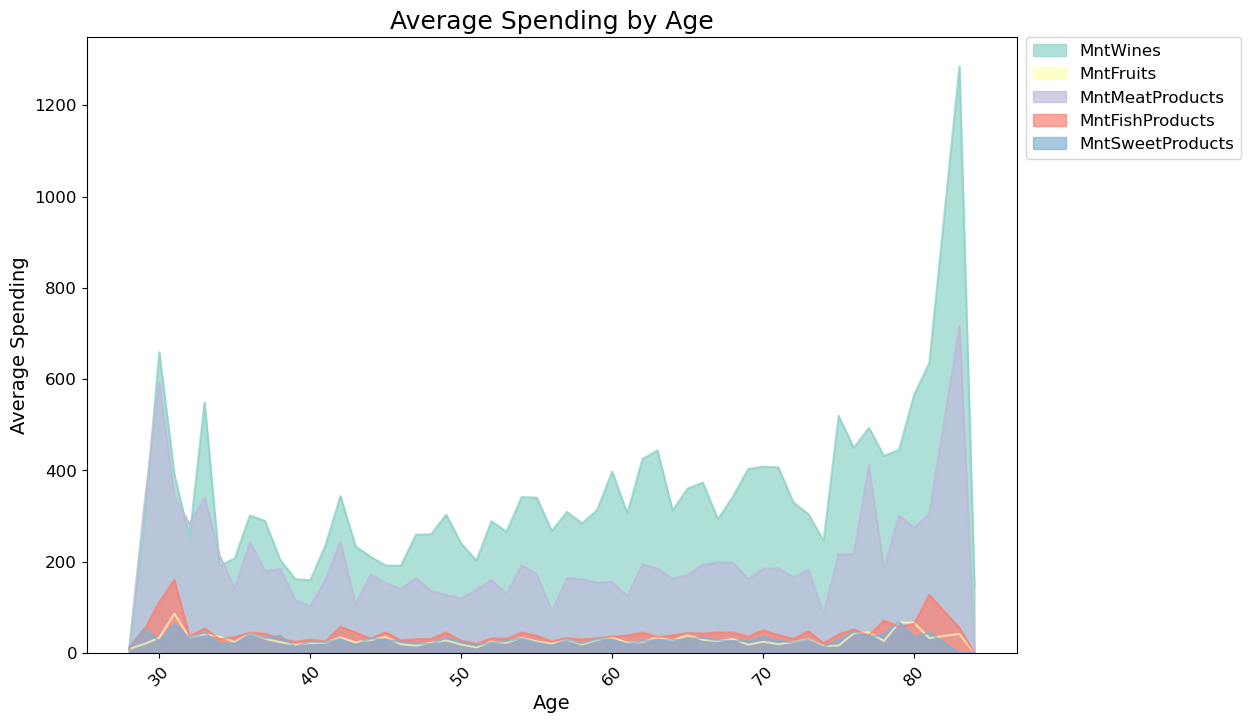

In [28]:
# Group by Age and calculate the mean of the selected columns
spending_by_age = consumer.groupby('Age')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
spending_by_age.set_index('Age').plot(kind='area', ax=ax, alpha=0.7, stacked=False)
ax.set_title("Average Spending by Age", fontsize=18)
ax.set_xlabel("Age", fontsize=14)
ax.set_ylabel("Average Spending", fontsize=14)
plt.xticks(rotation=45)

ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

The plot indicates the average spending by Age (18-75), it's notable that consumers of all age groups tend to spend widely on Wine and Meat products and showing the least interest in Sweet products. The age group of 20-25 and over 70 spend more on Fish products than other age groups. Spending on Sweet and Fruit products is relatively consistent across all age groups.

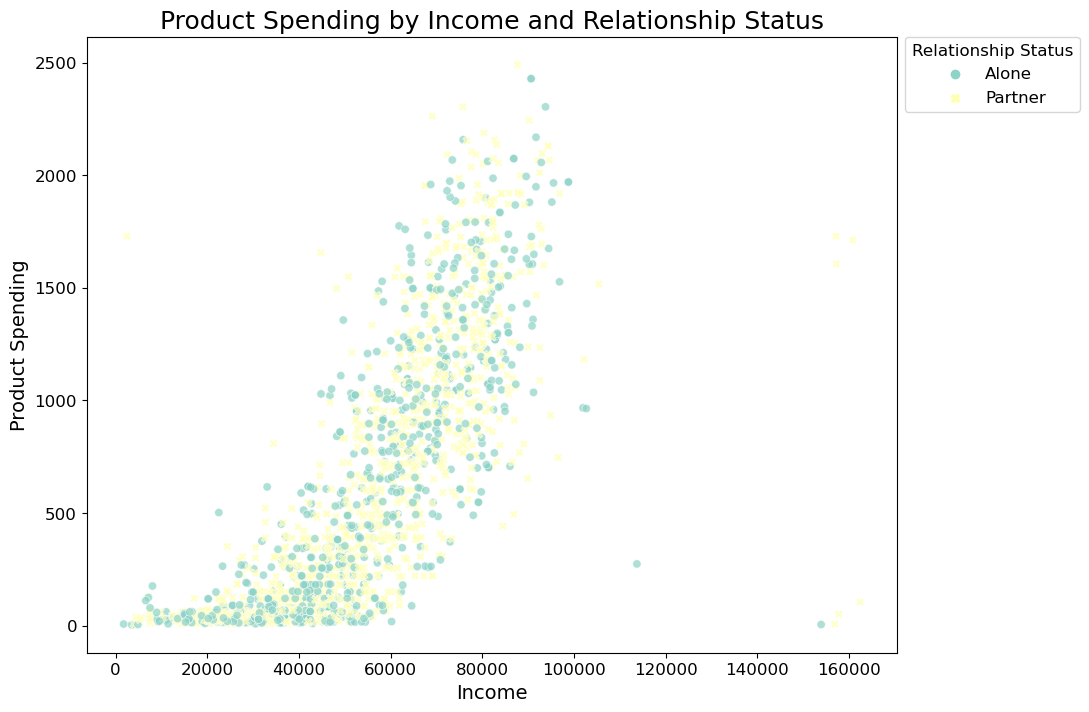

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Products_spent', data=consumer, hue='Relationship_Status', style='Relationship_Status', alpha=0.7)
plt.title('Product Spending by Income and Relationship Status', fontsize=18)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Product Spending', fontsize=14)
plt.legend(title='Relationship Status', loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.subplots_adjust(right=0.8)
plt.show()

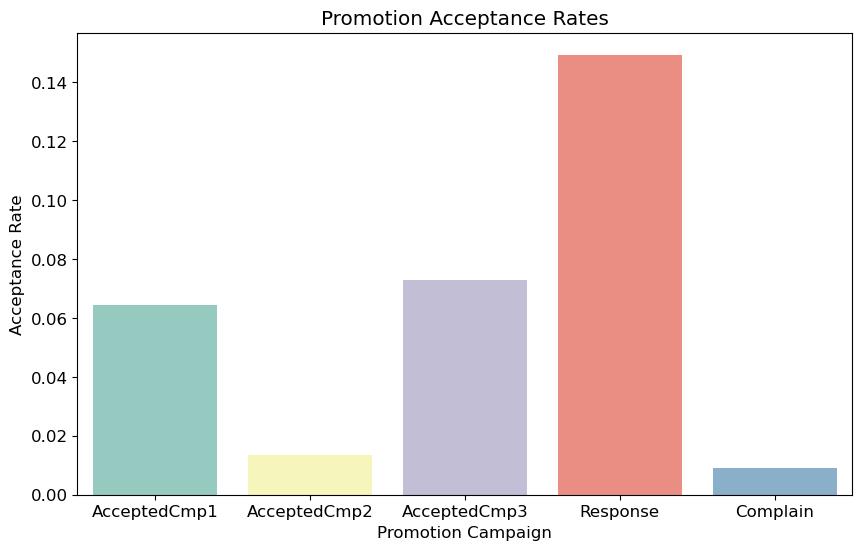

In [30]:

promotion_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'Response','Complain']
promotion_rates = consumer[promotion_cols].mean().reset_index().rename(columns={0: 'value'})
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='index', y= 'value', data=promotion_rates, ax=ax)
ax.set_xlabel('Promotion Campaign')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Promotion Acceptance Rates')
plt.xticks(rotation=0)
plt.show()

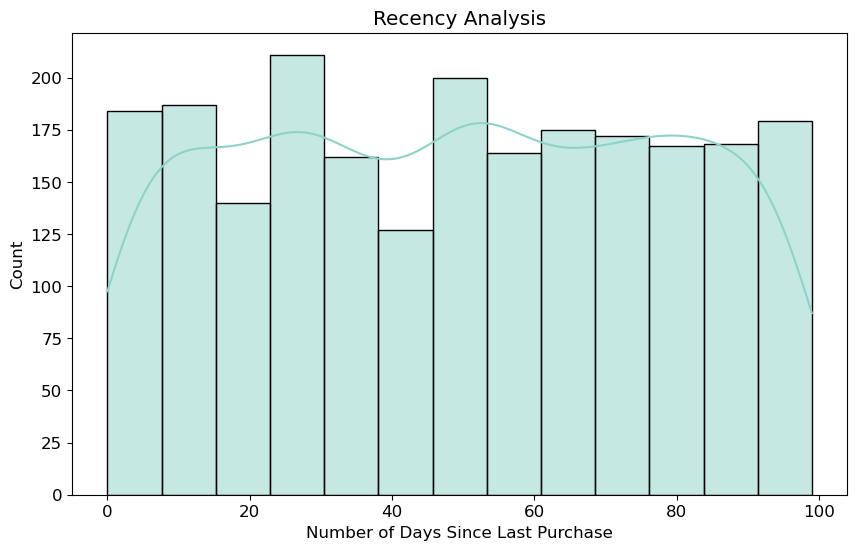

In [31]:
# Create a histogram for recency analysis
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=consumer, x='Recency', kde=True, ax=ax)
ax.set_xlabel('Number of Days Since Last Purchase')
ax.set_ylabel('Count')
ax.set_title('Recency Analysis')

plt.show()

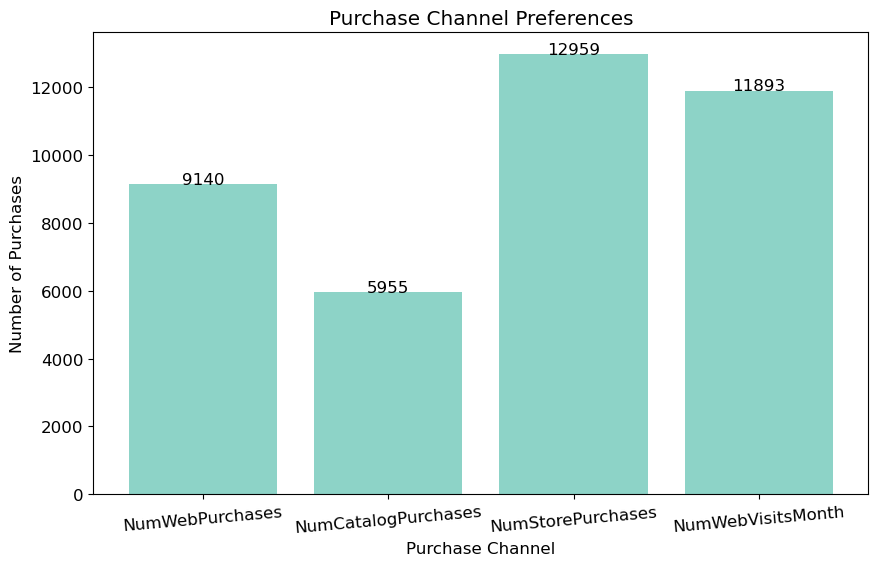

In [32]:
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
channel_purchases = consumer[purchase_channels].sum().reset_index()
channel_purchases.columns = ['Channel', 'Purchases']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(channel_purchases['Channel'], channel_purchases['Purchases'])
ax.set_xlabel('Purchase Channel')
ax.set_ylabel('Number of Purchases')
ax.set_title('Purchase Channel Preferences')

for i, v in enumerate(channel_purchases['Purchases']):
    ax.text(i, v + 5, str(v), ha='center')
plt.xticks(rotation=5)

plt.show()

The plot clearly indicates that consumers expressed a higher interest in purchasing products in-stores followed by the company's website, while showing a moderate interest in purchases made through a catalog.

In [33]:
# Calculate RFM scores
consumer['Recency_Score'] = consumer['Recency'].apply(lambda x: 5 if x <= 28 else (4 if x <= 56 else (3 if x <= 84 else (2 if x <= 112 else 1))))
consumer['Frequency_Score'] = consumer['NumStorePurchases'].apply(lambda x: 5 if x > 8 else (4 if x > 6 else (3 if x > 4 else (2 if x > 2 else 1))))
consumer['Monetary_Score'] = pd.qcut(consumer['Products_spent'], 5, labels=[1, 2, 3, 4, 5])

# Calculate RFM score
consumer['RFM_Score'] = consumer['Recency_Score'].astype(str) + consumer['Frequency_Score'].astype(str) + consumer['Monetary_Score'].astype(str)

# Segment customers based on RFM score
rfm_segmentation = consumer.groupby('RFM_Score').agg({
    'Products_spent': 'sum'
}).reset_index().rename(columns={'Products_spent': 'Total_Spending'})

rfm_segmentation = rfm_segmentation.sort_values(by=['Total_Spending'], ascending=False)
rfm_segmentation['Segment'] = rfm_segmentation['RFM_Score'].apply(lambda x: 'Champions' if x == '555' else ('Loyal Customers' if x.startswith('5') else ('Potential Loyalists' if x.startswith('4') else ('Promising' if x.startswith('3') else 'New Customers'))))

print(rfm_segmentation)


   RFM_Score  Total_Spending              Segment
51       455           99490  Potential Loyalists
33       355           93905            Promising
70       555           80937            Champions
32       354           70261            Promising
16       255           63000        New Customers
..       ...             ...                  ...
54       513             773      Loyal Customers
61       532             602      Loyal Customers
1        212             577        New Customers
0        211             343        New Customers
42       432             145  Potential Loyalists

[71 rows x 3 columns]


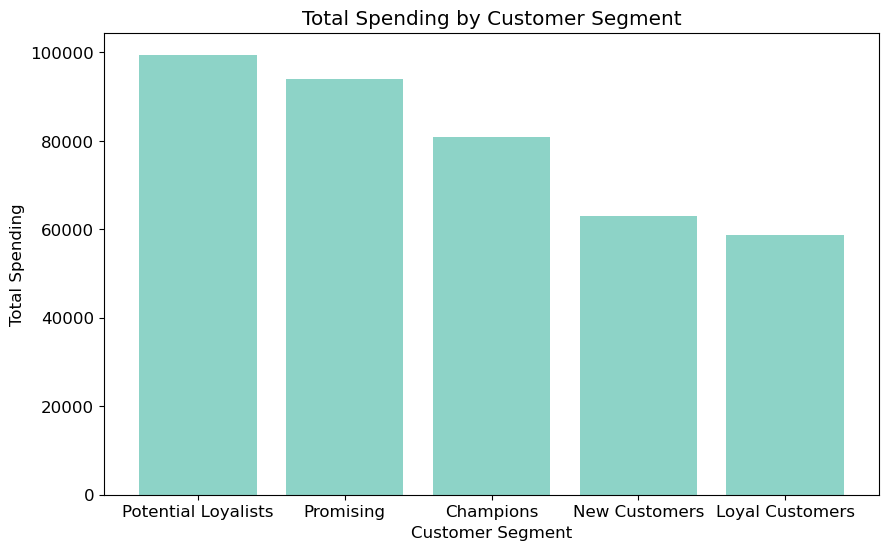

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(rfm_segmentation['Segment'], rfm_segmentation['Total_Spending'])
plt.xlabel('Customer Segment')
plt.ylabel('Total Spending')
plt.title('Total Spending by Customer Segment')
plt.xticks(rotation=0)
plt.show()

In [35]:
categorical_cols = consumer.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Education', 'Relationship_Status', 'RFM_Score'], dtype='object')


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
consumer['Education'] = le.fit_transform(consumer['Education'])
consumer['Relationship_Status'] = le.fit_transform(consumer['Relationship_Status'])

Converting the categorical variables into numerical variables by using LabelEncoder.

Education : 2n Cycle:0, Basic:1, Graduation:2, Master:3, PhD:4

Relationship_Status : Alone:0, Partner:1'

And coverting all other variable into int 

In [37]:
consumer["Income"] = consumer["Income"].astype('int')
consumer["Monetary_Score"] = consumer["Monetary_Score"].astype('int')
consumer["RFM_Score"] = consumer["RFM_Score"].astype('int')

In [38]:
consumer.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Age,Products_spent,Relationship_Status,Children,Family_Memeber,Parent,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,2,58138,0,0,58,635,88,546,172,88,...,67,1529,0,0,1,0,3,2,5,325
1,2,46344,1,1,38,11,1,6,2,1,...,70,21,0,2,3,1,4,1,1,411
2,2,18589,0,0,89,6,4,25,15,12,...,55,62,0,0,1,0,2,2,2,222
3,2,51322,1,0,19,5,1,3,3,263,...,38,275,0,1,2,1,5,1,3,513
4,2,79941,0,0,72,123,164,266,227,30,...,48,810,0,0,1,0,3,5,4,354
5,2,51322,2,1,96,48,5,48,6,10,...,73,117,0,3,4,1,2,2,2,222
6,2,35790,1,0,54,12,6,20,30,1,...,47,69,0,1,2,1,4,2,2,422
7,2,27938,1,0,31,13,0,8,2,1,...,36,24,0,1,2,1,4,2,1,421
8,2,51322,1,0,57,11,3,22,2,2,...,42,40,0,1,2,1,3,2,1,321
9,2,61823,0,1,26,523,7,134,37,14,...,72,715,0,1,2,1,5,5,4,554


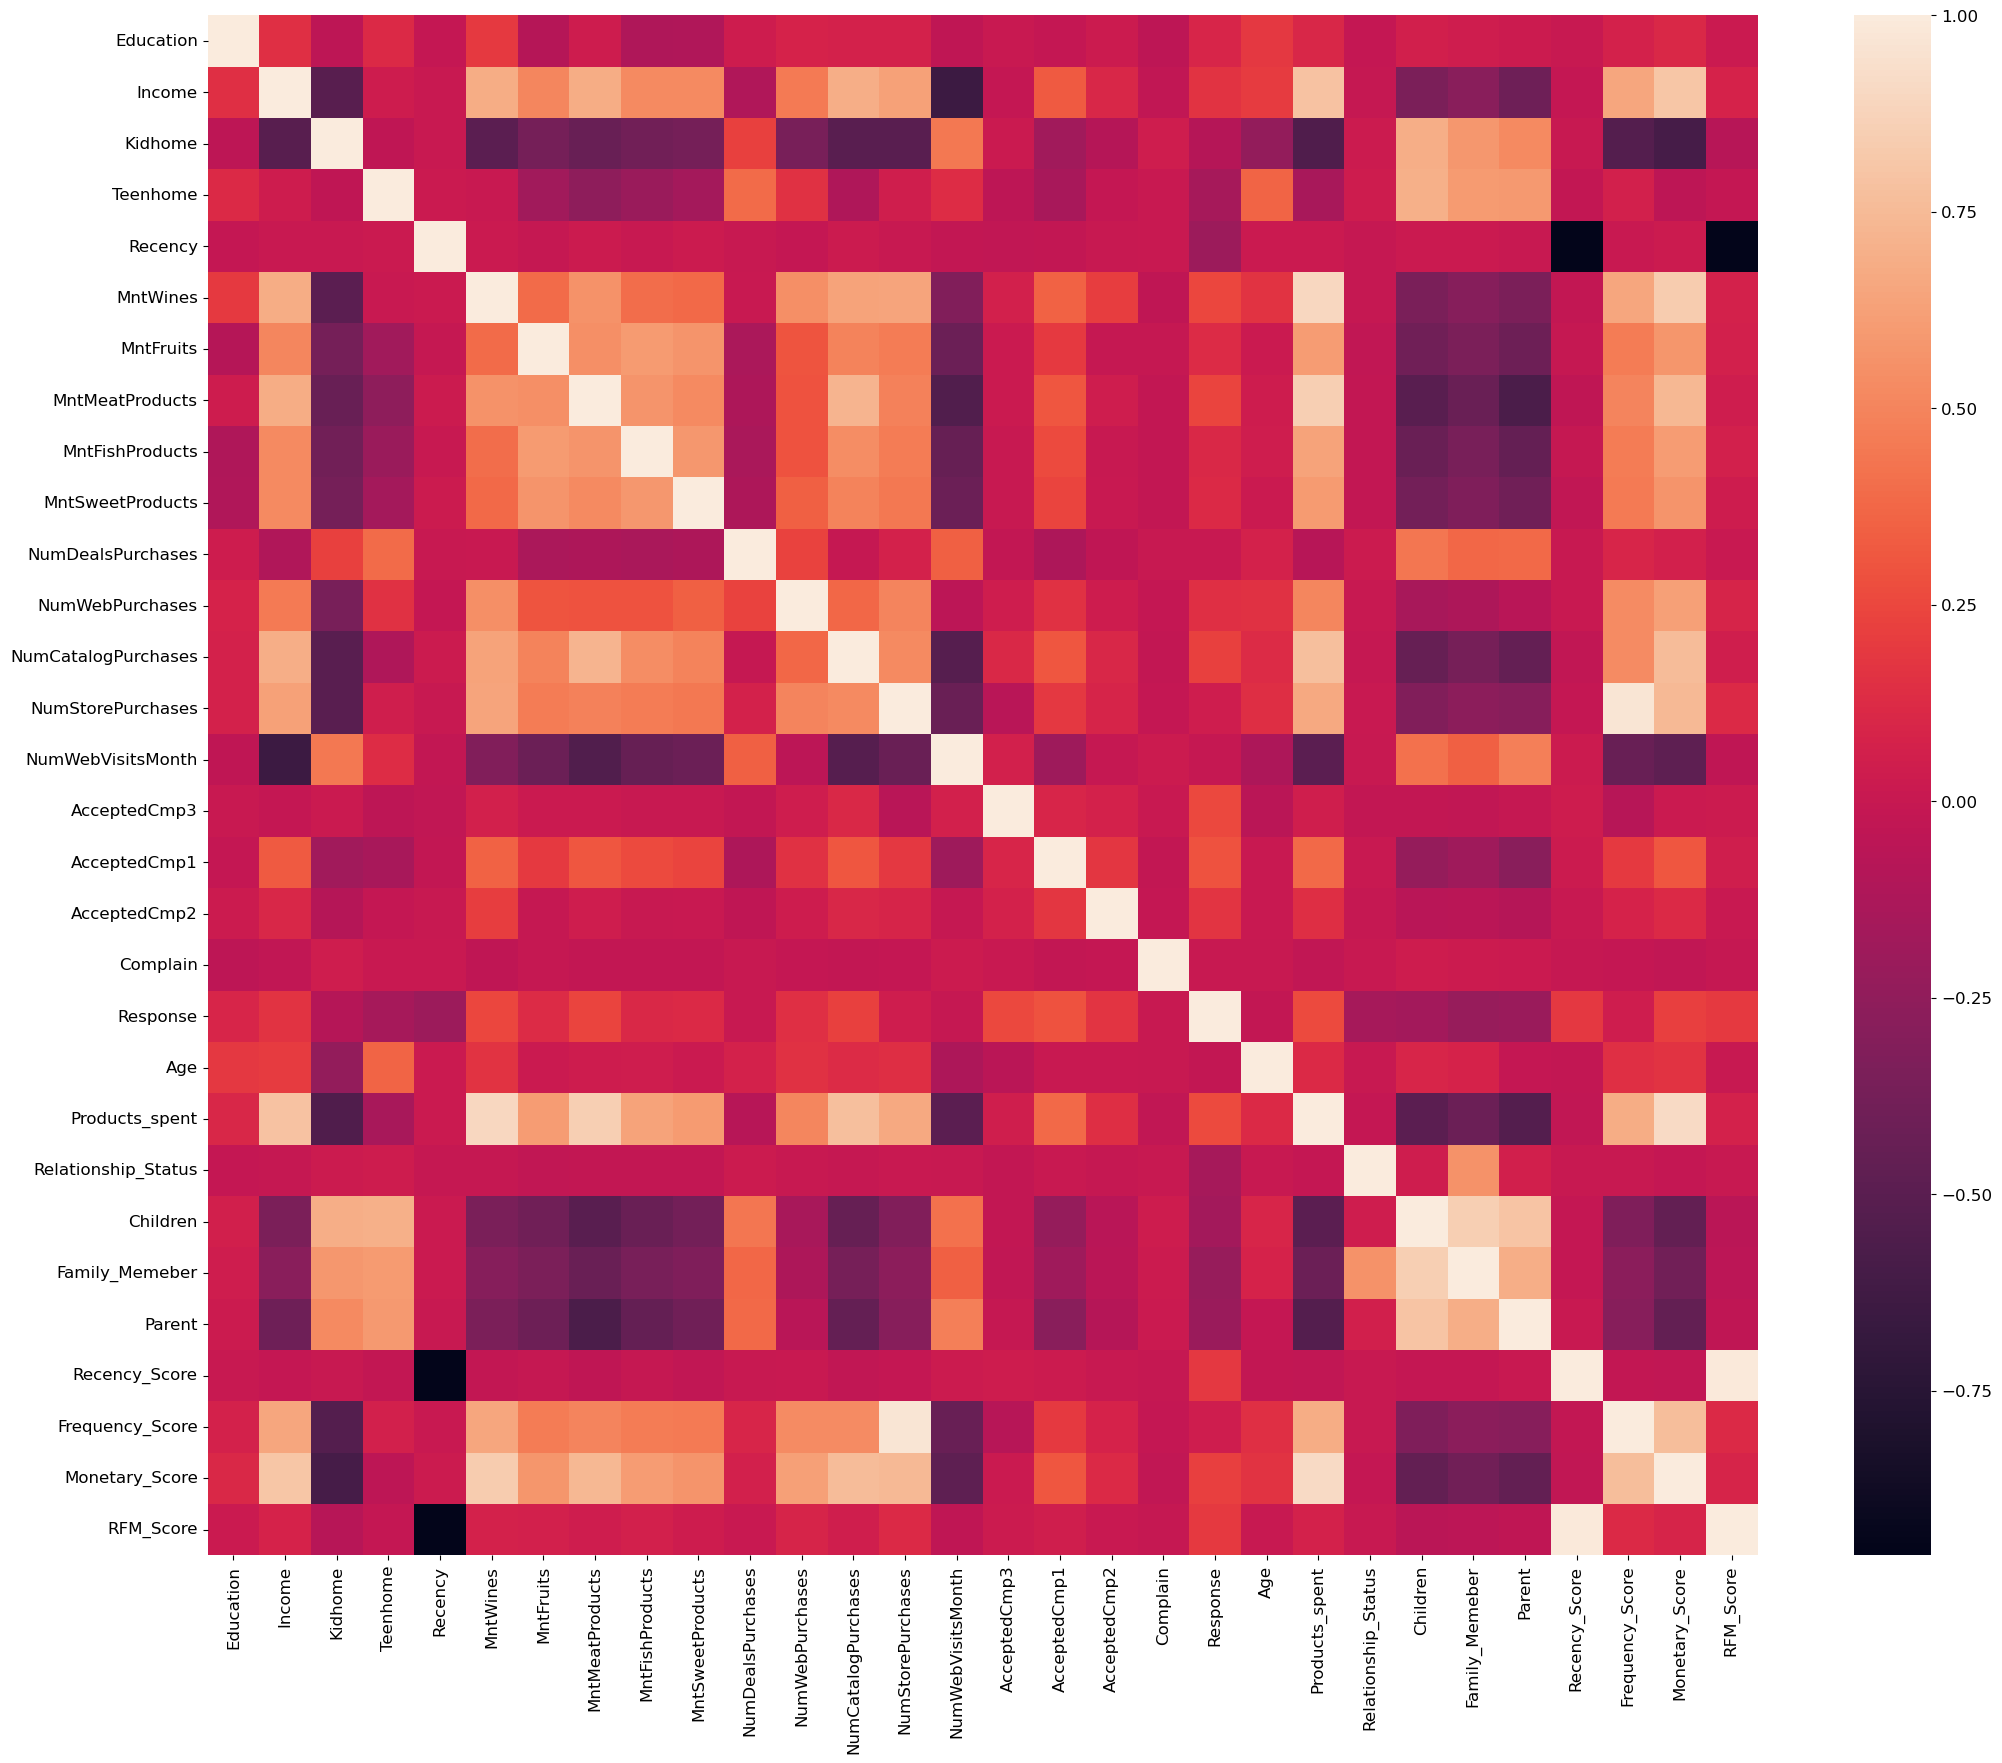

In [39]:
plt.figure(figsize = (25, 20))
sns.heatmap(data= consumer.corr())
plt.show()

In [40]:
data = consumer.copy()

features = ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchases', 'Age', 'Relationship_Status', 'Children', 'Family_Memeber', 'Parent', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

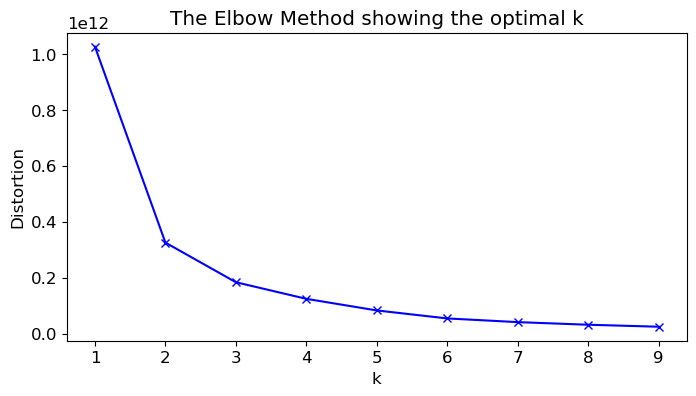

In [41]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [42]:
kmeans = KMeans(n_clusters= 3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters


cluster_analysis = data.groupby('Cluster')[features].mean()
cluster_analysis



,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,Age,Relationship_Status,Children,Family_Memeber,Parent,Recency_Score,Frequency_Score,Monetary_Score
Cluster,,,,,,,,,,,,,,,,,
0,74543.108456,0.012868,0.033088,592.373162,63.091912,448.227941,94.213235,65.360294,1.125000,55.977941,0.584559,0.045956,1.630515,0.045956,3.707721,4.022059,4.542279
1,60333.399129,0.233672,1.001451,461.375907,28.185776,153.676343,37.374456,28.716981,3.653120,59.357039,0.699565,1.235123,2.934688,1.000000,3.722787,3.878084,3.709724
2,33967.106680,0.822532,0.423729,39.770688,4.996012,23.585244,6.907278,5.194417,2.065803,51.703888,0.640080,1.246261,2.886341,0.882353,3.751745,1.837488,1.666002


In [43]:
data.columns 

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Products_spent', 'Relationship_Status', 'Children', 'Family_Memeber',
       'Parent', 'Recency_Score', 'Frequency_Score', 'Monetary_Score',
       'RFM_Score', 'Cluster'],
      dtype='object')

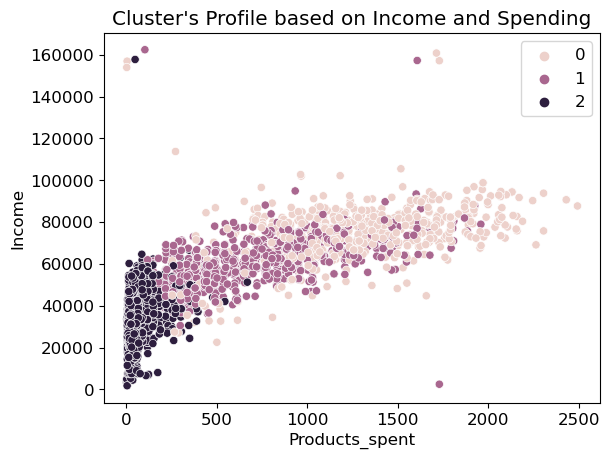

In [44]:
sns.scatterplot(data, x = 'Products_spent', y = 'Income', hue = 'Cluster')
plt.title("Cluster's Profile based on Income and Spending")
plt.legend()
plt.show()

Cluster's Profile based on Income and Spending
* Group 0: High spending and average income
* Group 1: High spending and high income
* Group 2: Low spending and low income

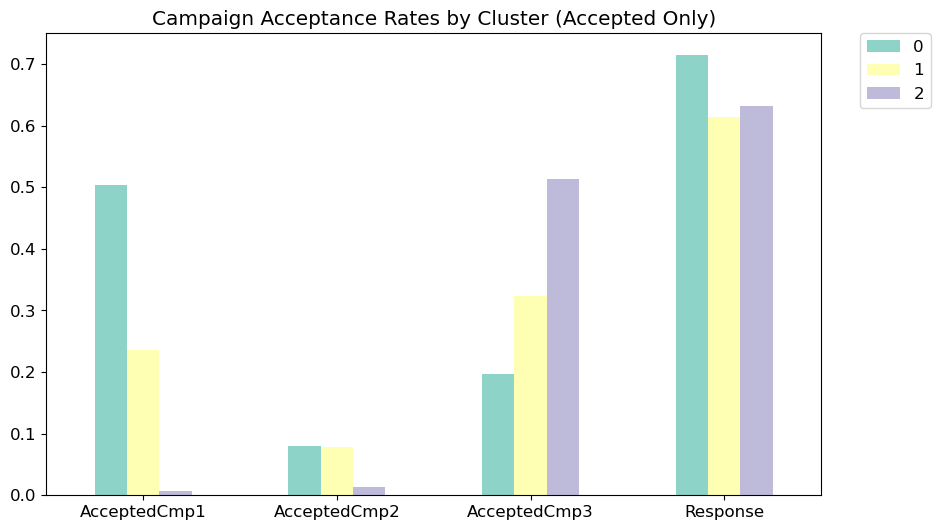

In [45]:
accepted_data = data[(data['AcceptedCmp1'] == 1) | (data['AcceptedCmp2'] == 1) | (data['AcceptedCmp3'] == 1) | (data['Response'] == 1) | (data['Complain'] == 1)]

campaign_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'Response']
fig, ax = plt.subplots(figsize=(10, 6))
accepted_data.groupby('Cluster')[campaign_features].mean().T.plot(kind='bar', ax=ax)
ax.set_title('Campaign Acceptance Rates by Cluster (Accepted Only)')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)
plt.show()

All segments of consumers didn’t show interest in the campaign 2 (AcceptedCmp2). In the first two campaigns, the cluster 2  people didn’t show much interest. The cluster 0 and 1 response rate is quite high

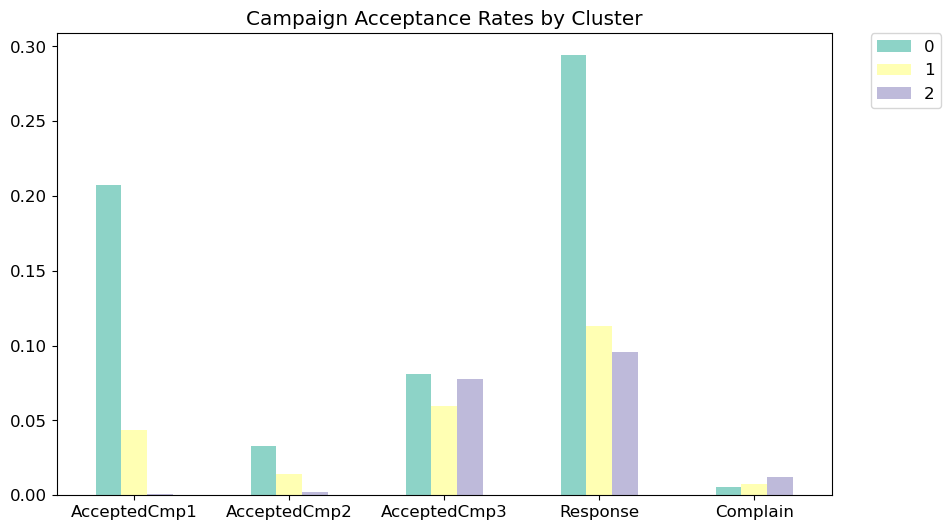

In [46]:
campaign_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'Response','Complain']
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby('Cluster')[campaign_features].mean().T.plot(kind='bar', ax=ax)
ax.set_title('Campaign Acceptance Rates by Cluster')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)
plt.show()

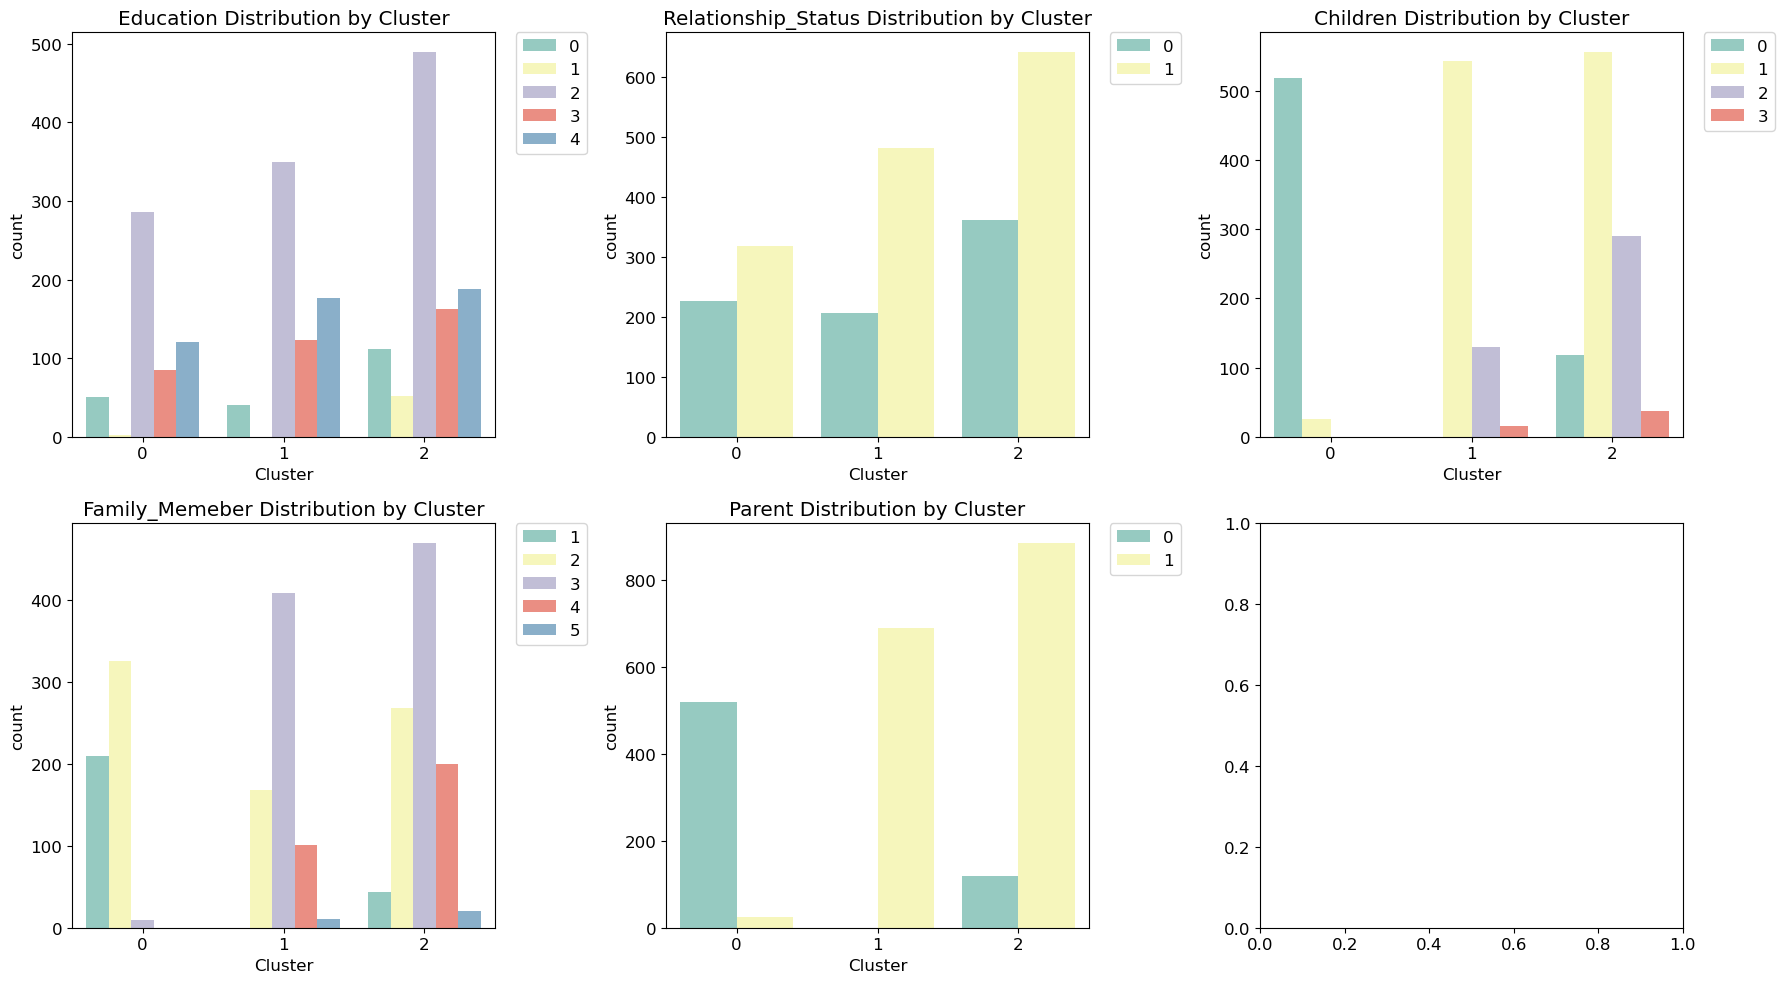

In [47]:
# Categorical features
cat_features = ['Education', 'Relationship_Status', 'Children', 'Family_Memeber', 'Parent']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i, feature in enumerate(cat_features):
    row, col = i // 3, i % 3
    sns.countplot(x='Cluster', hue=feature, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution by Cluster')
    axes[row, col].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


* Eductions: It was observed that consumers with graduation backgrounds and PhD holders are high in all clusters. However, Basic degree holders are not present in clusters 0 and 1, and in cluster 2, they are present in low numbers. On the other hand, 2nCycle degree holders are highly present in cluster 2. Finally, Masters degree holders are equally distributed among all clusters.
* Relationship Status: Consumers who are in a partnership are highly represented in all clusters.
* Family: Most instances have family size 1 to 3 and most instances have either 0 child or 1 to 2 child.

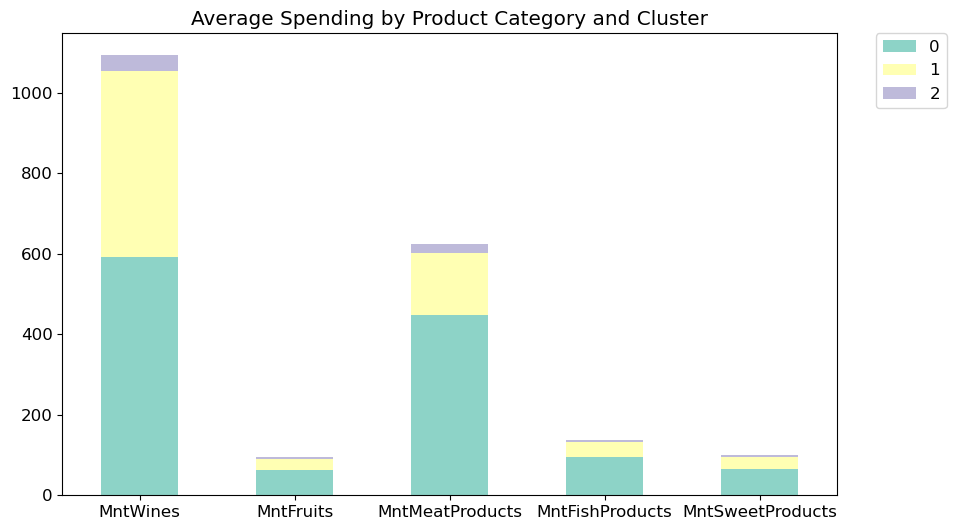

In [48]:
# Spending Patterns
spending_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby('Cluster')[spending_features].mean().T.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Average Spending by Product Category and Cluster')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)
plt.show()




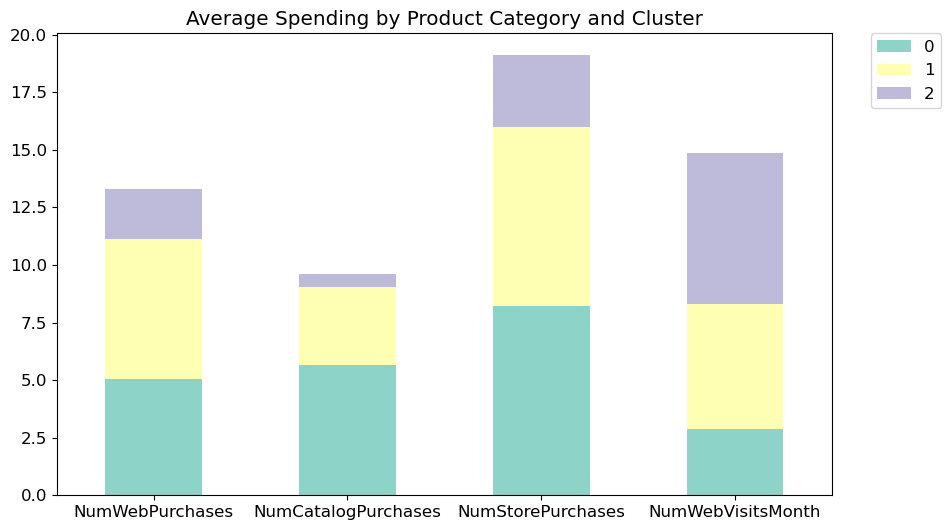

In [49]:

spending_feature = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby('Cluster')[spending_feature].mean().T.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Average Spending by Product Category and Cluster')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)
plt.show()


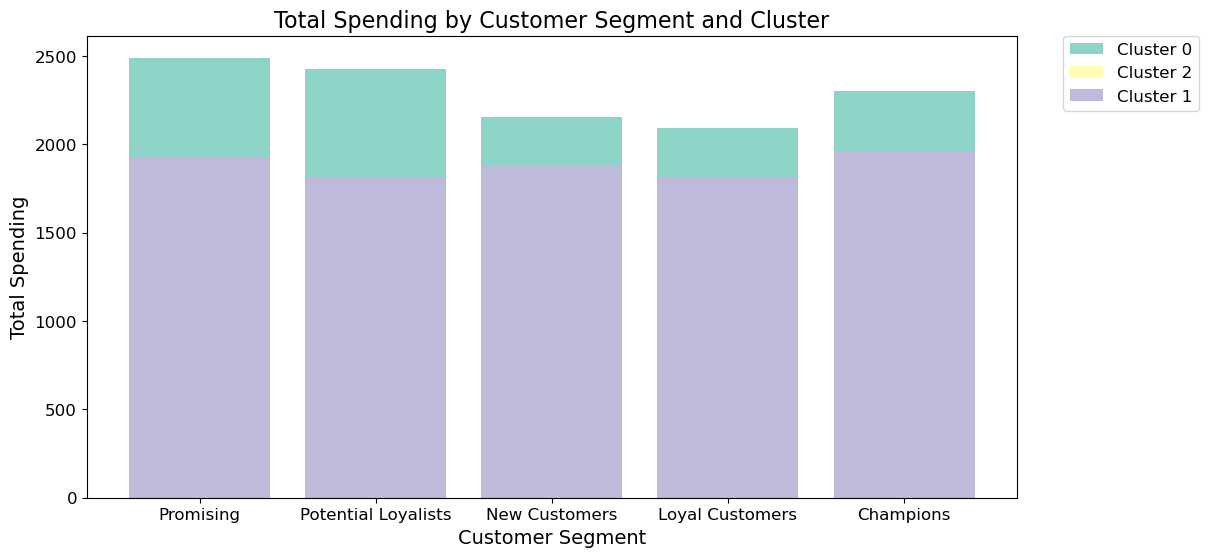

In [50]:
data['Segment'] = data['RFM_Score'].astype(str).apply(lambda x: 'Champions' if x == '555' else ('Loyal Customers' if x.startswith('5') else ('Potential Loyalists' if x.startswith('4') else ('Promising' if x.startswith('3') else 'New Customers'))))

# Visualize total spending by customer segment and cluster
plt.figure(figsize=(12, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.bar(cluster_data['Segment'], cluster_data['Products_spent'], label=f'Cluster {cluster}')
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.title('Total Spending by Customer Segment and Cluster', fontsize=16)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()